#  Titanic Survival - Exploratory Data Analysis
**Author:** Vanshika Verma  
**Date:** April 14, 2025

In this notebook, we perform an exploratory data analysis (EDA) of the Titanic dataset.
The goal is to understand which factors influenced passenger survival using statistical summaries and visualizations.

We'll explore:
- The structure of the dataset
- Missing values and data types
- Patterns in age, gender, class, fare, and survival
- Correlations between features


##  Import Libraries

These libraries will help with data manipulation (Pandas, NumPy), visualization (Matplotlib, Seaborn), and notebook rendering.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
%matplotlib inline


##  Load Dataset

We’ll load the `train.csv`, `test.csv`, and `gender_submission.csv` files from the `data/` directory using Pandas.


In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
gender = pd.read_csv('data/gender_submission.csv')

##  Initial Exploration

Let’s take a closer look at the structure and summary of the training dataset. We'll examine column data types, basic statistics, and check for missing values.

In [3]:
# Check shape and column types
print("Train shape:", train.shape)
train.info()

Train shape: (891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# Basic statistics for numerical columns
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# Check for missing values
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##  Initial Exploration Summary

- The dataset contains **891 rows** and **12 columns**.
- Each row represents a unique passenger aboard the Titanic.
- Variables include passenger demographics (age, sex, class), family information, fare, cabin, and embarkation point.
- Several columns have **missing values**:
  - `Age`: 177 missing values → around 20% of data.
  - `Cabin`: 687 missing values → more than 75%, indicating this column may be dropped or partially extracted.
  - `Embarked`: 2 missing values → can be safely filled with the most frequent port (`'S'`).
- Most columns are of type `int64`, `float64`, or `object`.  
  Data types are appropriate and ready for cleaning/analysis.

###  Handling Missing Values in the Age Column
The Age column contains missing values. Since age is a continuous numerical feature and may contain outliers, we impute the missing values using the median rather than the mean. The median is a more robust measure of central tendency and helps avoid skewing the distribution due to extreme values.

In [6]:
#Data cleaning(missing values in age)
train['Age'] = train['Age'].fillna(train['Age'].median())


In [7]:
#fill in embarked
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])

In [8]:
#drop cabin column
train.drop(columns='Cabin', inplace=True)


##  Data Cleaning Steps

- Filled missing `Age` values with the median age.
- Filled missing `Embarked` values with the most common port: `'S'` (Southampton).
- Dropped the `Cabin` column due to excessive missing values (over 75%).

##  Univariate Analysis

moving onto this section, we explore individual columns to understand their distributions and spot potential outliers or skewness.


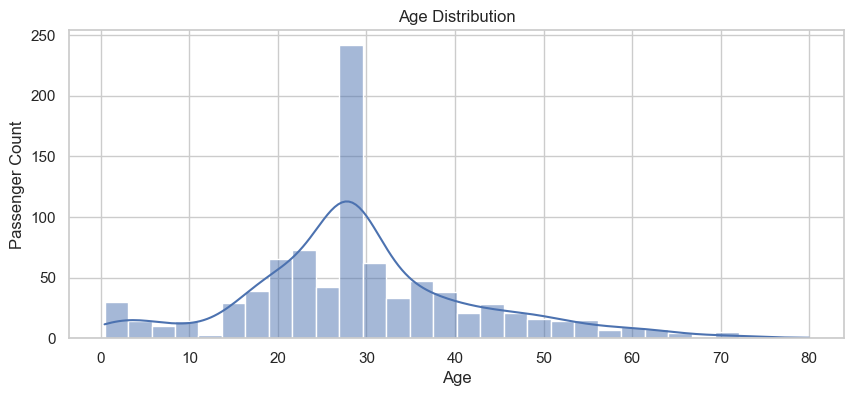

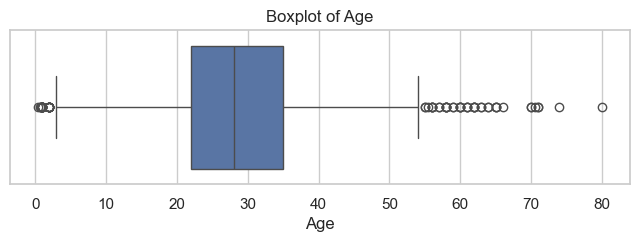

In [9]:
#Age Distribution (Histogram + Boxplot)
# Histogram
plt.figure(figsize=(10, 4))
sns.histplot(train['Age'], kde=True, bins=30)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Passenger Count")
plt.show()

# Boxplot
plt.figure(figsize=(8, 2))
sns.boxplot(x=train['Age'])
plt.title("Boxplot of Age")
plt.show()

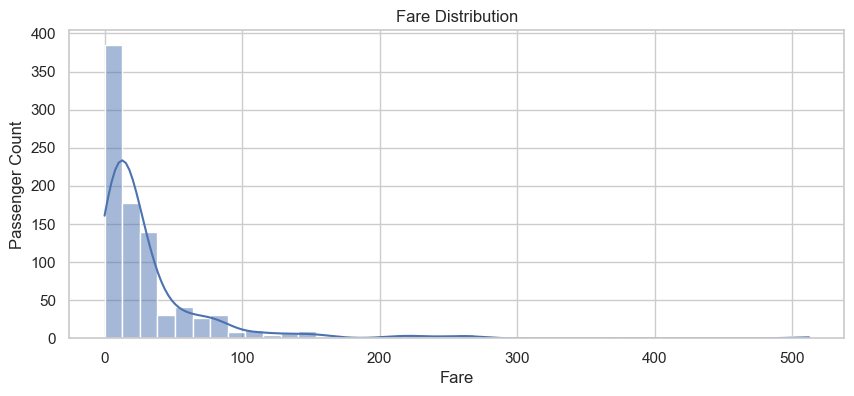

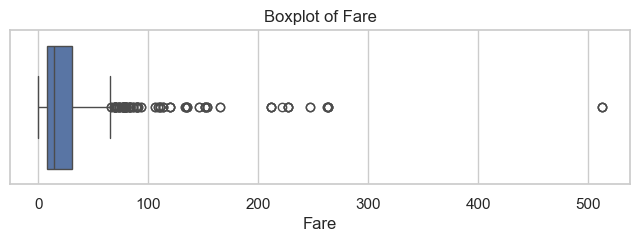

In [10]:
#Fare Distribution (Histogram + Boxplot)
# Histogram
plt.figure(figsize=(10, 4))
sns.histplot(train['Fare'], kde=True, bins=40)
plt.title("Fare Distribution")
plt.xlabel("Fare")
plt.ylabel("Passenger Count")
plt.show()

# Boxplot
plt.figure(figsize=(8, 2))
sns.boxplot(x=train['Fare'])
plt.title("Boxplot of Fare")
plt.show()


##  Categorical Feature Distribution

Let’s explore the distribution of categorical features using bar plots.

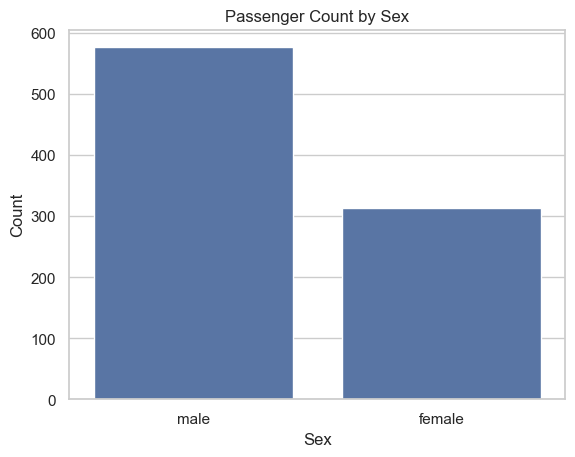

In [11]:
#Distribution of Sex
sns.countplot(x='Sex', data=train)
plt.title("Passenger Count by Sex")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

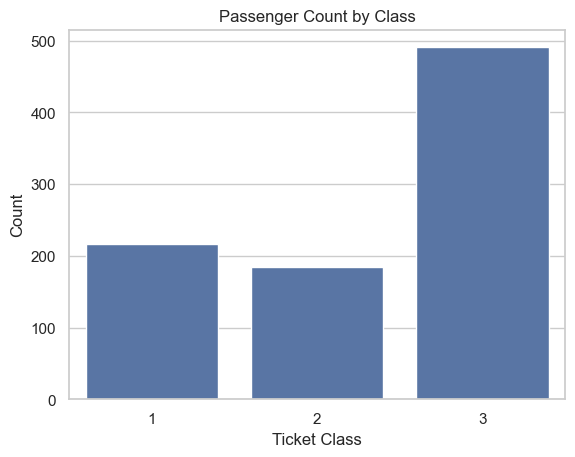

In [12]:
#Distribution of Pclass
sns.countplot(x='Pclass', data=train)
plt.title("Passenger Count by Class")
plt.xlabel("Ticket Class")
plt.ylabel("Count")
plt.show()

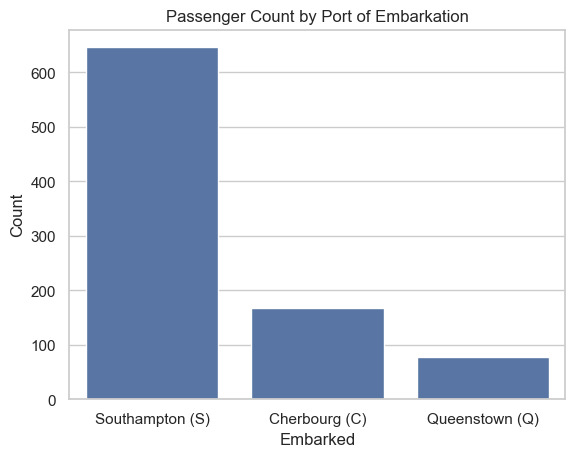

In [13]:
#Distribution of Embarked
sns.countplot(x='Embarked', data=train)
plt.title("Passenger Count by Port of Embarkation")
plt.xlabel("Embarked")
plt.ylabel("Count")
plt.xticks([0, 1, 2], ['Southampton (S)', 'Cherbourg (C)', 'Queenstown (Q)'])
plt.show()


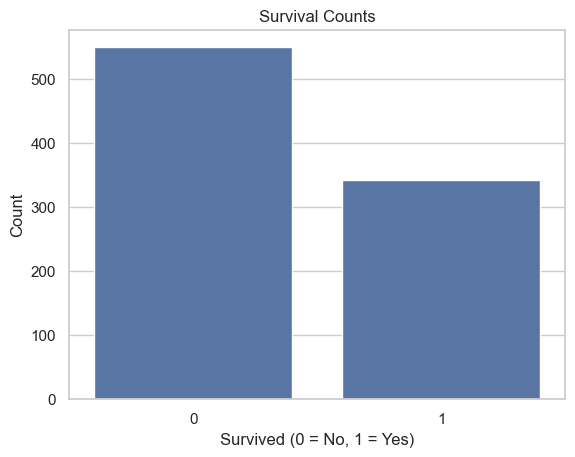

In [14]:
#Distribution of Survived
sns.countplot(x='Survived', data=train)
plt.title("Survival Counts")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

##  Univariate Analysis Summary
- **Numeric Columns**:
  - `Age`: Slightly right-skewed; most passengers were between 20–40 years. Boxplot shows moderate outliers.
  - `Fare`: Highly right-skewed due to a few very high fares. Most passengers paid under 100 units.
  - `SibSp & Parch`: Distributions are right-skewed and heavily concentrated at 0, meaning most passengers traveled alone or with just one family member.

- **Categorical Columns**:
  - `Sex`: More male passengers than female.
  - `Pclass`: 3rd class had the highest number of passengers, followed by 1st and 2nd.
  - `Embarked`: Majority boarded from Southampton (S), followed by Cherbourg (C) and Queenstown (Q).
  - `Survived`: Around 38% survived — notable class imbalance to consider in later analysis or modeling.

##  Bivariate Analysis

Now that we've explored each feature individually, let's analyze how they relate to the target variable: **Survived**. This helps uncover which features may influence survival outcomes.

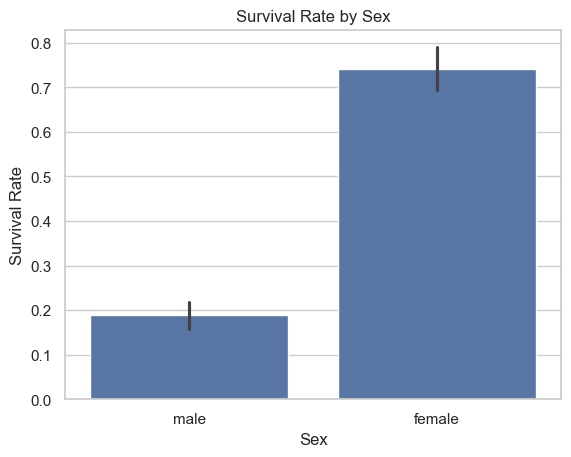

Survived,0,1
Sex,,
female,0.26,0.74
male,0.81,0.19


In [15]:
#categorical features vs survival
# Survival Rate by Sex
sns.barplot(x='Sex', y='Survived', data=train)
plt.title('Survival Rate by Sex')
plt.ylabel('Survival Rate')
plt.show()

# Table: Proportion survived by Sex
pd.crosstab(train['Sex'], train['Survived'], normalize='index').round(2)


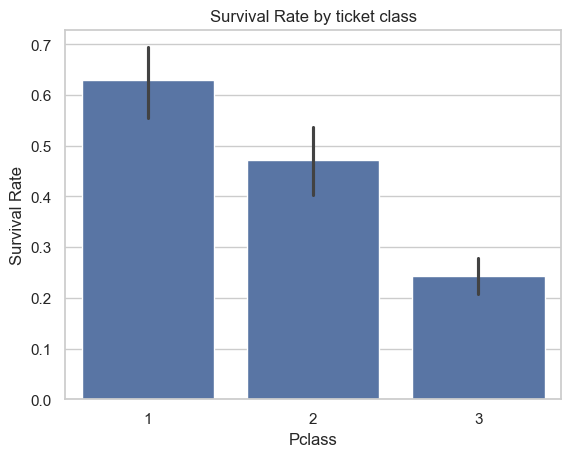

Survived,0,1
Pclass,,
1,0.37,0.63
2,0.53,0.47
3,0.76,0.24


In [ ]:
# Survival Rate by Pclass
sns.barplot(x='Pclass', y='Survived', data=train)
plt.title('Survival Rate by ticket class')
plt.ylabel('Survival Rate')
plt.show()

# Table: Proportion survived by Pclass
pd.crosstab(train['Pclass'], train['Survived'], normalize='index').round(2)

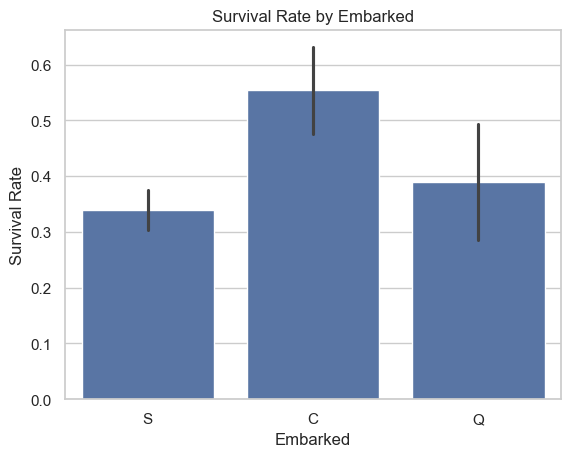

Survived,0,1
Embarked,,
C,0.45,0.55
Q,0.61,0.39
S,0.66,0.34


In [ ]:
# Survival Rate by Embarked people
sns.barplot(x='Embarked', y='Survived', data=train)
plt.title('Survival Rate by Embarked')
plt.ylabel('Survival Rate')
plt.show()

# Table: Proportion survived by Embarked
pd.crosstab(train['Embarked'], train['Survived'], normalize='index').round(2)


###  Convert SibSp + Parch to "Alone"/"With Family"
An intuitive feature to make it more human-readable.

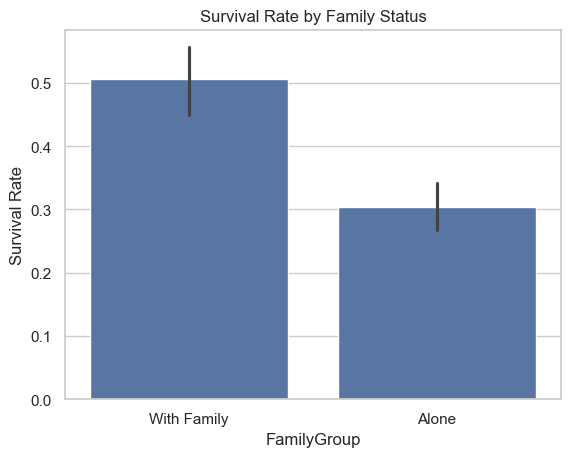

In [18]:
train['FamilyGroup'] = np.where((train['SibSp'] + train['Parch']) > 0, 'With Family', 'Alone')

# Plot Survival by FamilyGroup
sns.barplot(x='FamilyGroup', y='Survived', data=train)
plt.title('Survival Rate by Family Status')
plt.ylabel('Survival Rate')
plt.show()

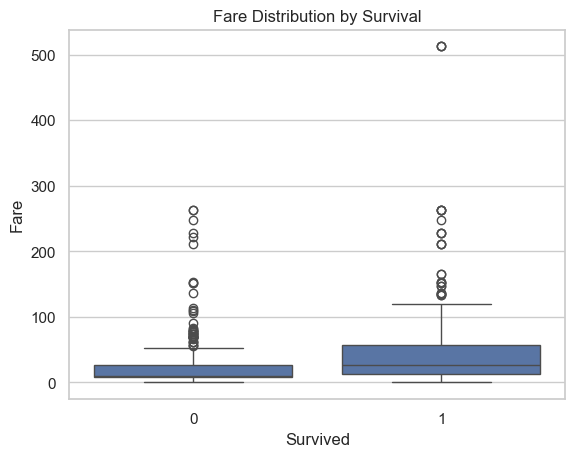

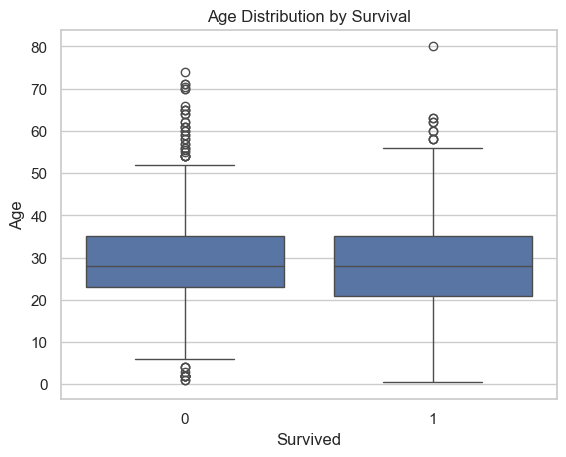

In [19]:
#Numerical Features vs Survival
# Fare vs Survival
sns.boxplot(x='Survived', y='Fare', data=train)
plt.title('Fare Distribution by Survival')
plt.show()

# Age vs Survival
sns.boxplot(x='Survived', y='Age', data=train)
plt.title('Age Distribution by Survival')
plt.show()

##  Bivariate Analysis Summary
Now that we've explored individual feature distributions, let's examine how different variables relate to the target — Survival.

**Categorical Features vs Survival**

`Sex:`
A significant survival gap exists — most females survived, whereas most males did not. This implies that gender had a strong influence, likely due to the "women and children first" evacuation priority.

`Pclass:`
1st Class: ~63% survived
2nd Class: ~47% survived
3rd Class: Only ~24% survived
This shows a clear socioeconomic survival bias, with higher-class passengers having better survival chances.

`Embarked:`
*Cherbourg (C)* passengers had the highest survival rate (~55%)

*Queenstown (Q):* ~39%

*Southampton (S):* Lowest at ~34%
Port of embarkation likely correlates with class distribution or cabin access during evacuation.

`Family Status (SibSp & Parch):`
Passengers with family (non-zero SibSp or Parch) had a noticeably higher survival rate than those who traveled alone. Emotional support or group decision-making might have contributed to this.

**Numerical Features vs Survival**

`Age:`
Median ages of survivors and non-survivors were similar.
However, survivors slightly skewed toward younger ages.
Outliers (older passengers) existed in both groups.

`Fare:`
Survivors generally paid higher fares, as reflected by a shifted boxplot median.
The highest fares belonged to survivors, reinforcing the advantage of wealth/class during the disaster.

##  Correlation Analysis
Let's explore the correlations between numerical features and the target variable `Survived` to better understand potential predictive power.


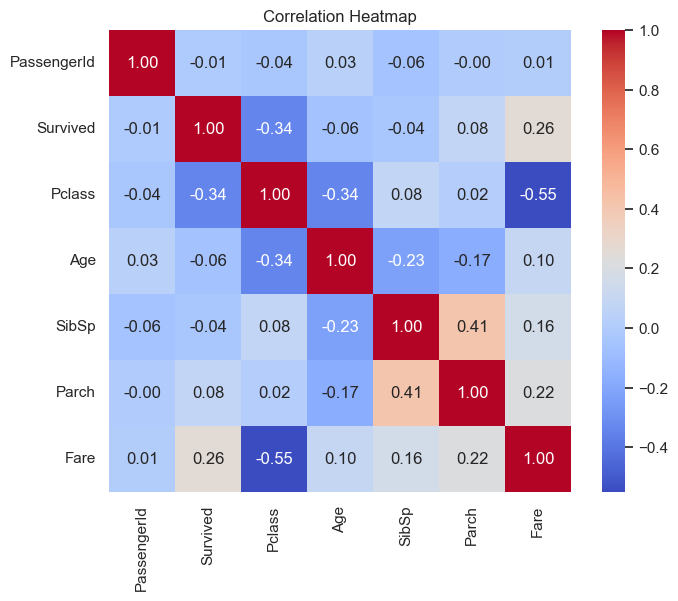

In [20]:
#correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = train.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Heatmap')
plt.show()

- The most positively correlated feature with survival is `Fare`, though still moderate.
- `Pclass` is negatively correlated with survival, reaffirming that higher-class passengers were more likely to survive.
- `SibSp` and `Parch` have weak correlations, suggesting that **family presence alone** isn't a strong numeric predictor — but **combined as a group**, it shows potential (as seen in bivariate analysis).

##  Final Observations and Summary

This exploratory data analysis on the Titanic dataset revealed key insights:

- **Sex** is the strongest categorical predictor — females had a much higher survival rate.
- **Pclass** strongly influenced survival, with 1st class passengers faring the best.
- **Embarked** location had a small but notable impact — Cherbourg passengers had higher survival.
- **Fare** showed a moderate positive correlation with survival.
- **Age**, **SibSp**, and **Parch** had limited standalone impact but revealed more when grouped (e.g., family vs alone).

These insights can inform feature engineering and model design in the next step: **predictive modeling**.
